In [98]:
from poloniex import Poloniex
polo = Poloniex()
import os, datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px
import datetime

#input date time and Symbol
startdate = '1/11/2010'
end_date= now.strftime("%d/%m/%Y")
Symbol = 'USDT_BTC'

#Set the time period to use. time categories: 7200, 14400, and 86400(daily).
timeperiod = 86400

#set the moving averages to use. MA = Simple Moving Average and EMA = Exponential Moving Average
MA1 =10
MA2 = 50
EMA1 = 10
EMA2 = 50

#pull HISTORICAL DATA
#86400 denotes daily
import pandas as pd
Daily_data =polo.returnChartData(Symbol, timeperiod, start= datetime.datetime.strptime(startdate, "%d/%m/%Y").timestamp(), end= datetime.datetime.strptime(end_date, "%d/%m/%Y").timestamp())
Daily_data = pd.DataFrame(Daily_data)
Daily_data['True Date']= pd.to_datetime(Daily_data['date'], unit='s')
Daily_data['Year']=  Daily_data['True Date'].dt.year

#moving average columns
Daily_data['MA'+str(MA1)] = Daily_data['close'].rolling(MA1).mean()
Daily_data['MA'+str(MA2)] = Daily_data['close'].rolling(MA2).mean()
Daily_data['EMA'+str(EMA1)] = Daily_data['close'].ewm(span = 10).mean()
Daily_data['EMA'+str(EMA2)] = Daily_data['close'].ewm(span = 50).mean()
#Rules
#Signal cross of 10 over 50 Buy at close price Logic 10>50 or short 10<50
#Always gong to be long or short
#Use closing prices
#Profit/Loss -- For buy (10>50) profit = close on day of cross until until 10<50 Reversal.
#Profit/Loss -- For Sell this is the reverse
#charts: Line chart, sma's and closing price
#profit LOSS calculator

Daily_data.head(2)
print(now.strftime("%d/%m/%Y"))

28/03/2019


In [99]:
MA1

10

In [100]:
#drop the Nan to get to the start of the moving averages
Daily_data_SMA= Daily_data.dropna()
Daily_data_SMA

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50
49,269.000000,1428537600,269.000000,240.880000,245.559495,3.726719,9.107176e+02,244.375177,2015-04-09,2015,254.256118,257.183195,255.642158,257.259788
50,236.195000,1428624000,249.900000,99.000000,243.555000,1.915918,4.470240e+02,233.321032,2015-04-10,2015,252.941765,257.027095,252.106184,256.310289
51,234.872500,1428710400,249.900000,230.100000,233.157500,12.057949,2.872855e+03,238.254074,2015-04-11,2015,251.529015,256.919545,248.972695,255.349607
52,232.050000,1428796800,235.735000,230.100000,234.872500,8.326835,1.952868e+03,234.527087,2015-04-12,2015,249.234015,256.660545,245.895767,254.311302
53,246.000000,1428883200,246.000000,230.100000,232.050000,0.386712,9.193344e+01,237.731255,2015-04-13,2015,248.334015,256.880545,245.914719,253.942895
54,219.909265,1428969600,234.000076,213.718400,234.000076,1.649512,3.734008e+02,226.370407,2015-04-14,2015,244.882224,256.578730,241.186379,252.441986
55,225.129300,1429056000,225.139500,217.695208,219.909265,0.456779,1.006576e+02,220.363968,2015-04-15,2015,241.925532,256.286316,238.266871,251.243331
56,229.577898,1429142400,229.577898,221.290807,226.261749,1.201412,2.666896e+02,221.980206,2015-04-16,2015,239.413699,256.122874,236.687041,250.296934
57,223.488077,1429228800,226.623582,222.934687,224.787600,0.205372,4.582084e+01,223.111252,2015-04-17,2015,236.450907,255.822636,234.287208,249.131068
58,221.500000,1429315200,221.656150,221.500000,221.656150,0.200000,4.430037e+01,221.501832,2015-04-18,2015,233.772204,255.272636,231.962245,247.934558


In [101]:
#create the long/short column:
def buy_sell (row):
   if row['MA10'] > row['MA50'] :
      return 'LONG'
   if row['MA10'] < row['MA50'] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_SMA['Go Long or Short'] = longshort


C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_SMA['SMA entry and exit'] = Daily_data_SMA['Go Long or Short'].eq(Daily_data_SMA['Go Long or Short'].shift())
Daily_data_SMA.to_csv('SMA.csv')

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [103]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_SMA.loc[Daily_data_SMA['SMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['SMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['SMA Cumulative Profit or Loss'] =  EntryandExit['SMA Profit or Loss'].cumsum()

EntryandExit.head(4)

C:\Users\Jonas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,Go Long or Short,SMA entry and exit,SMA Profit or Loss,SMA Cumulative Profit or Loss
49,269.0000,1428537600,269.0000,240.88,245.559495,3.726719,910.717567,244.375177,2015-04-09,2015,254.256118,257.183195,255.642158,257.259788,SHORT,False,NaN,NaN
84,-243.2662,1431561600,249.5324,236.01,240.771396,1.312979,318.918726,242.897107,2015-05-14,2015,238.411853,238.175409,239.651958,238.934393,LONG,False,25.7338,25.7338
105,225.0000,1433376000,229.0000,225.00,229.000000,0.060991,13.935990,228.492048,2015-06-04,2015,233.986346,234.056422,233.025019,237.304057,SHORT,False,-18.2662,7.4676
118,-250.0000,1434499200,250.0000,234.32,234.320000,1.438727,357.929989,248.782420,2015-06-17,2015,236.731800,236.513993,237.846066,236.599597,LONG,False,-25.0000,-17.5324


In [104]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['SMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['SMA Profit or Loss'].min()
largest_winner = EntryandExit['SMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 36 trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the strategy was $6076.17. The largest single winner was $6889.4 and the largest drawdown was $-2319.99


In [105]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','SMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()
#df1 = df[['a','b']]
#EntryandExit.groupby(['Year','SMA Cumulative Profit or Loss'])
#profit_by_year.sum()

,SMA Profit or Loss
Year,
2015,20.467600
2016,230.502001
2017,2608.926333
2018,1336.818516
2019,1879.451403


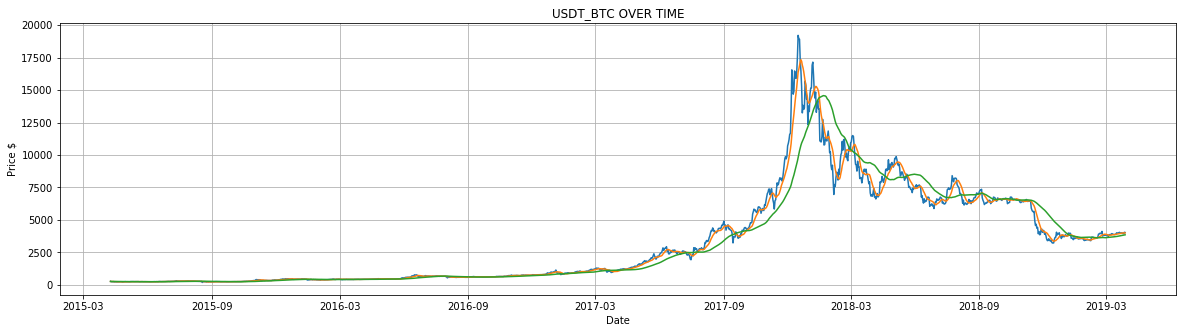

In [106]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['close'])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['MA10'])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['MA50'])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()


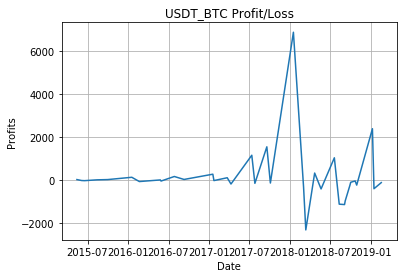

In [107]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

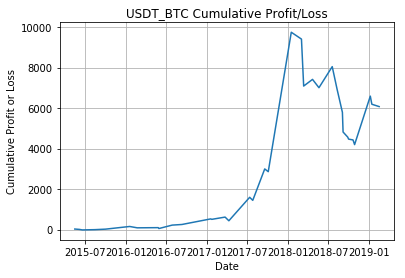

In [108]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Cumulative Profit/Loss")
plt.ylabel("Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

Start of Second Strategy: Exponential Moving average

In [109]:
#drop the Nan to get to the start of the moving averages
Daily_data_EMA= Daily_data.dropna()

In [110]:
#create the long/short column:
def buy_sell (row):
   if row['EMA10'] > row['EMA50'] :
      return 'LONG'
   if row['EMA10'] < row['EMA50'] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_EMA['EMA Go Long or Short'] = longshort

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [111]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_EMA['EMA entry and exit'] = Daily_data_EMA['EMA Go Long or Short'].eq(Daily_data_EMA['EMA Go Long or Short'].shift())
Daily_data_EMA.to_csv('ema_output.csv')
Daily_data_EMA

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,EMA Go Long or Short,EMA entry and exit
49,269.000000,1428537600,269.000000,240.880000,245.559495,3.726719,9.107176e+02,244.375177,2015-04-09,2015,254.256118,257.183195,255.642158,257.259788,SHORT,False
50,236.195000,1428624000,249.900000,99.000000,243.555000,1.915918,4.470240e+02,233.321032,2015-04-10,2015,252.941765,257.027095,252.106184,256.310289,SHORT,True
51,234.872500,1428710400,249.900000,230.100000,233.157500,12.057949,2.872855e+03,238.254074,2015-04-11,2015,251.529015,256.919545,248.972695,255.349607,SHORT,True
52,232.050000,1428796800,235.735000,230.100000,234.872500,8.326835,1.952868e+03,234.527087,2015-04-12,2015,249.234015,256.660545,245.895767,254.311302,SHORT,True
53,246.000000,1428883200,246.000000,230.100000,232.050000,0.386712,9.193344e+01,237.731255,2015-04-13,2015,248.334015,256.880545,245.914719,253.942895,SHORT,True
54,219.909265,1428969600,234.000076,213.718400,234.000076,1.649512,3.734008e+02,226.370407,2015-04-14,2015,244.882224,256.578730,241.186379,252.441986,SHORT,True
55,225.129300,1429056000,225.139500,217.695208,219.909265,0.456779,1.006576e+02,220.363968,2015-04-15,2015,241.925532,256.286316,238.266871,251.243331,SHORT,True
56,229.577898,1429142400,229.577898,221.290807,226.261749,1.201412,2.666896e+02,221.980206,2015-04-16,2015,239.413699,256.122874,236.687041,250.296934,SHORT,True
57,223.488077,1429228800,226.623582,222.934687,224.787600,0.205372,4.582084e+01,223.111252,2015-04-17,2015,236.450907,255.822636,234.287208,249.131068,SHORT,True
58,221.500000,1429315200,221.656150,221.500000,221.656150,0.200000,4.430037e+01,221.501832,2015-04-18,2015,233.772204,255.272636,231.962245,247.934558,SHORT,True


In [112]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_EMA.loc[Daily_data_EMA['EMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['EMA Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['EMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['EMA Cumulative Profit or Loss'] =  EntryandExit['EMA Profit or Loss'].cumsum()
EntryandExit.head(4)

C:\Users\Jonas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,EMA Go Long or Short,EMA entry and exit,EMA Profit or Loss,EMA Cumulative Profit or Loss
49,269.00000,1428537600,269.00000,240.880000,245.559495,3.726719,910.717567,244.375177,2015-04-09,2015,254.256118,257.183195,255.642158,257.259788,SHORT,False,NaN,NaN
82,-244.90444,1431388800,244.90444,239.071136,239.071136,0.021542,5.195308,241.176460,2015-05-12,2015,237.485494,238.322107,238.726327,238.723756,LONG,False,24.09556,24.095560
91,232.52550,1432166400,233.14750,230.839998,233.147500,38.745732,9008.533534,232.503893,2015-05-21,2015,240.916550,236.901961,238.855037,239.180285,SHORT,False,-12.37894,11.716619
94,-243.00000,1432425600,243.00000,235.656032,241.950000,0.134683,32.506798,241.358380,2015-05-24,2015,240.288616,236.039241,239.758600,239.334869,LONG,False,-10.47450,1.242119


In [113]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['EMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['EMA Profit or Loss'].min()
largest_winner = EntryandExit['EMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 28 trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the strategy was $4936.9. The largest single winner was $6834.12 and the largest drawdown was $-2159.06


In [114]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','EMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()

,EMA Profit or Loss
Year,
2015,11.136369
2016,113.471136
2017,390.854773
2018,1947.418456
2019,2474.018907


In [115]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','EMA Cumulative Profit or Loss']]
profit_by_year.groupby(['Year']).sum()

,EMA Cumulative Profit or Loss
Year,
2015,10.652649
2016,570.116610
2017,4284.298212
2018,44081.503624
2019,4936.899641


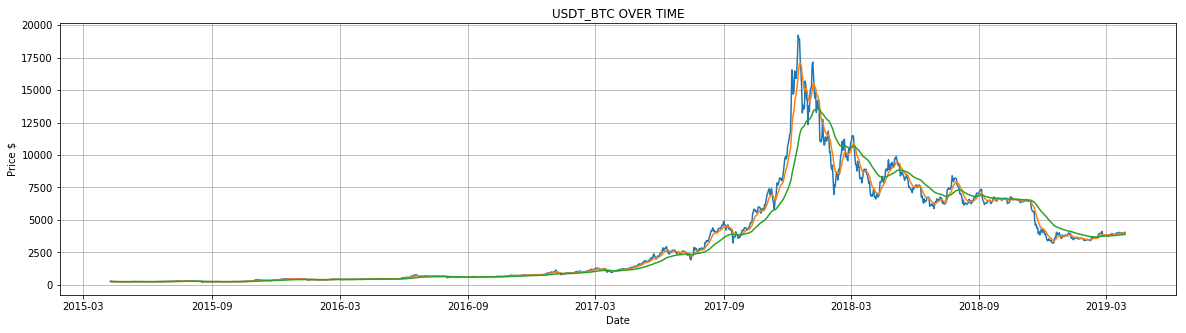

In [116]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['close'])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['EMA10'])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['EMA50'])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

In [117]:
px.line(Daily_data_EMA, x='True Date',y='close' )


In [118]:
import datetime

now = datetime.datetime.now()
print(now)


2019-03-28 22:15:11.985849


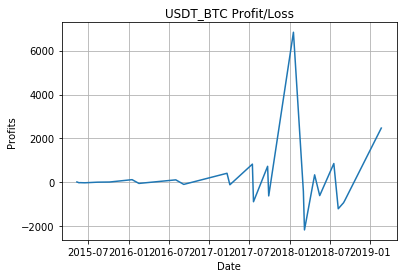

In [119]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

In [120]:
EntryandExit

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,EMA Go Long or Short,EMA entry and exit,EMA Profit or Loss,EMA Cumulative Profit or Loss
49,269.000000,1428537600,269.000000,240.880000,245.559495,3.726719,9.107176e+02,244.375177,2015-04-09,2015,254.256118,257.183195,255.642158,257.259788,SHORT,False,NaN,NaN
82,-244.904440,1431388800,244.904440,239.071136,239.071136,0.021542,5.195308e+00,241.176460,2015-05-12,2015,237.485494,238.322107,238.726327,238.723756,LONG,False,24.095560,24.095560
91,232.525500,1432166400,233.147500,230.839998,233.147500,38.745732,9.008534e+03,232.503893,2015-05-21,2015,240.916550,236.901961,238.855037,239.180285,SHORT,False,-12.378940,11.716619
94,-243.000000,1432425600,243.000000,235.656032,241.950000,0.134683,3.250680e+01,241.358380,2015-05-24,2015,240.288616,236.039241,239.758600,239.334869,LONG,False,-10.474500,1.242119
95,234.947125,1432512000,242.000000,234.158668,236.922050,0.097688,2.309187e+01,236.383019,2015-05-25,2015,239.452078,235.644259,238.883787,239.159023,SHORT,False,-8.052875,-6.810756
118,-250.000000,1434499200,250.000000,234.320000,234.320000,1.438727,3.579300e+02,248.782420,2015-06-17,2015,236.731800,236.513993,237.846066,236.599597,LONG,False,-15.052875,-21.863631
175,263.000000,1439424000,269.877281,260.000000,263.392554,3.189384,8.389865e+02,263.055984,2015-08-13,2015,273.098246,274.880413,271.302256,271.932166,SHORT,False,13.000000,-8.863631
230,-243.000000,1444176000,252.386760,241.000000,242.250000,2.381772,5.867269e+02,246.340493,2015-10-07,2015,241.407800,233.208892,240.333290,239.880672,LONG,False,20.000000,11.136369
332,370.000000,1452988800,394.100000,369.716955,386.461867,36.261759,1.384250e+04,381.738234,2016-01-17,2016,421.433803,423.473960,408.887618,411.199691,SHORT,False,127.000000,138.136369
363,-413.500000,1455667200,426.000000,399.550000,411.500000,117.918274,4.877064e+04,413.596950,2016-02-17,2016,392.452017,402.392187,396.836669,394.638874,LONG,False,-43.500000,94.636369


In [121]:
px.bar(Daily_data_EMA, x='True Date',y='close', color ='Year')
#px.scatter(EntryandExit, x='True Date',y='MA10')

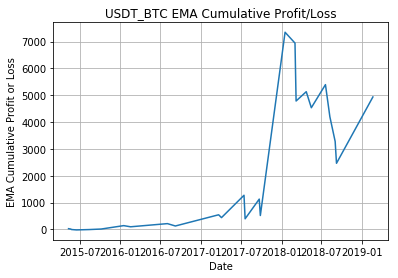

In [122]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} EMA Cumulative Profit/Loss")
plt.ylabel("EMA Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()